In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv("/content/data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.drop(['id','Unnamed: 32'], axis=1)
display(df.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [7]:
df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [8]:
df['diagnosis'].unique()

array([1, 0])

In [9]:
x=df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [10]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
sc=StandardScaler()

xtr_n=sc.fit_transform(xtr)
xte_n=sc.transform(xte)

In [12]:
xtr.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.1126,0.04462,0.04304,0.1537,0.06171,...,15.3,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.225,0.08321


In [13]:
xte.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
528,13.94,13.17,90.31,594.2,0.1248,0.09755,0.101,0.06615,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.1015,0.216,0.07253


In [14]:
model1=LogisticRegression()
model1.fit(xtr_n,ytr)

pred1=model1.predict(xte_n)
print("Accuracy of basic model:",accuracy_score(pred1,yte))

Accuracy of basic model: 0.9736842105263158


In [15]:
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(xtr_n,ytr)

pred2=model2.predict(xte_n)
print("Accuracy of KNN model:",accuracy_score(pred2,yte))

Accuracy of KNN model: 0.9912280701754386


In [16]:
#here we got more accuracy in knn than logisticR

In [17]:
scores=[]

for j in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=j)
  knn.fit(xtr_n,ytr)
  pred=knn.predict(xte_n)
  acc=print(accuracy_score(pred,yte),j)
  scores.append(acc)


  acc_matrix=pd.DataFrame(scores)

0.956140350877193 1
0.9736842105263158 2
0.9912280701754386 3
0.9736842105263158 4
0.9736842105263158 5
0.9736842105263158 6
0.9736842105263158 7
0.9736842105263158 8
0.9736842105263158 9
0.9736842105263158 10
0.9736842105263158 11
0.9736842105263158 12
0.9736842105263158 13
0.9649122807017544 14


In [18]:
#here the final n_neighbors wil be 3

In [19]:
xtr_n_2d = xtr_n[:, [0, 1]]

decisoion boundary plotting using mlxtend

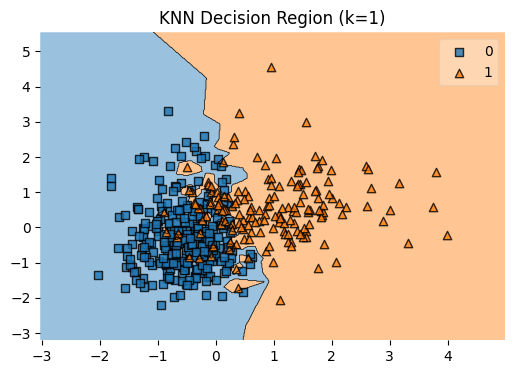

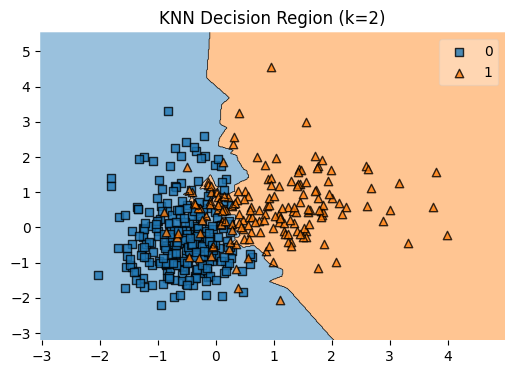

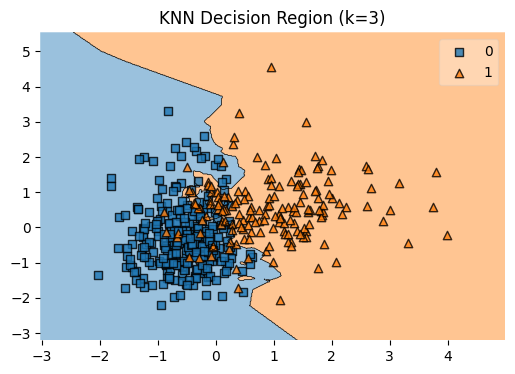

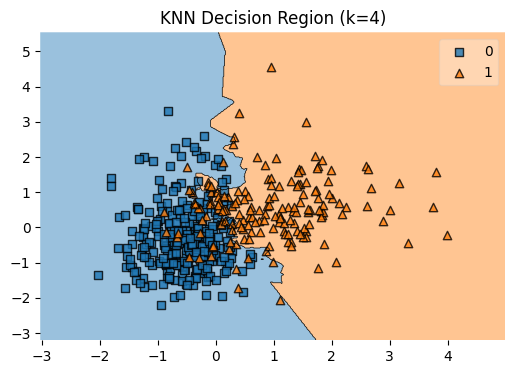

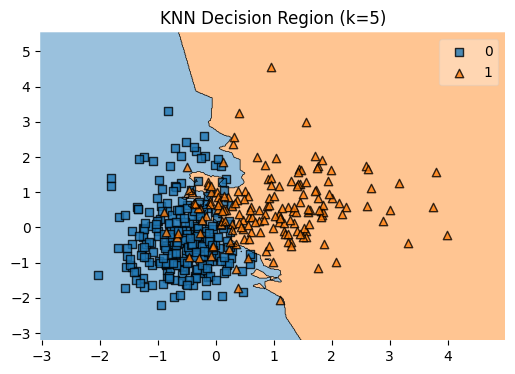

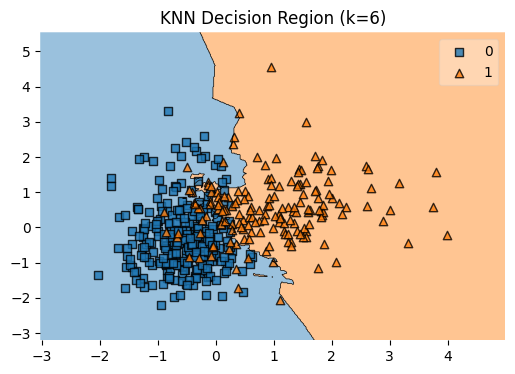

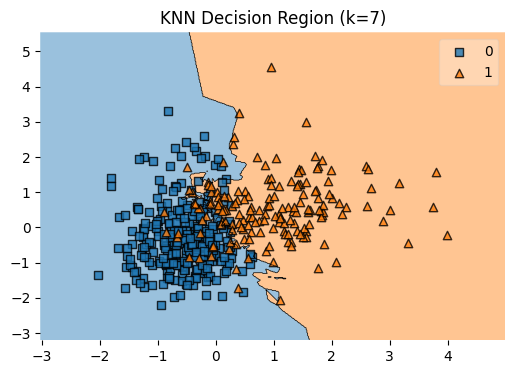

In [23]:
for j in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(xtr_n_2d, ytr)
    plt.figure(figsize=(6, 4))
    plot_decision_regions(xtr_n_2d, ytr.values, clf=knn)
    plt.title(f"KNN Decision Region (k={j})")
    plt.show()